# Lab 1 - Medical Imaging

## Importing libraries

In [51]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

## Loading data

In [52]:
x = loadmat('ct.mat')

# select variable 'im' and convert it from dictionary to numpy array
im = np.array(x['ct'])

# print image size
[rows, cols, slices] = im.shape
print(rows, cols, slices)

512 512 256


## Display images

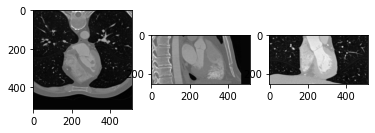

In [53]:
ax_slice = im[:,:,slices//2]
sag_slice = np.rot90(im[:, cols//2, :])
cor_slice = np.rot90(im[rows//2, :, :])


plt.figure("Mid Orthogonal Slices")
plt.subplot(1, 3, 1)
plt.imshow(ax_slice, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(sag_slice, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(cor_slice, cmap="gray")


## 1. Display a histogram of the CT image intensities (i.e. CT indexes), and then a histogram  of the corresponding attenuation coefficients, by converting CT indexes to attenuation coefficients.

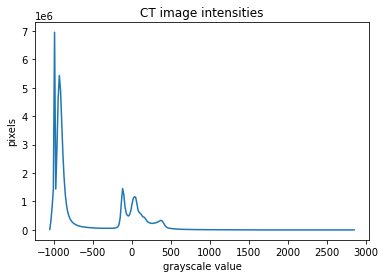

In [54]:
# create the histogram
histogram, bin_edges = np.histogram(im, bins=256)
# configure and draw the histogram figure
plt.figure()
plt.title("CT image intensities")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

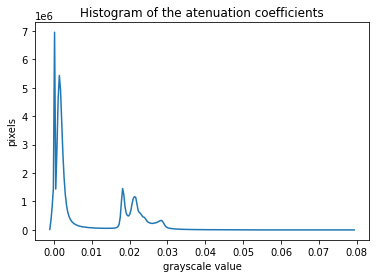

In [55]:
# create the histogram
mu_H2O = 0.0206
mu_ct = im*mu_H2O/1000 + mu_H2O
histogram, bin_edges = np.histogram(mu_ct, bins=256)

# configure and draw the histogram figure
plt.figure()
plt.title("Histogram of the atenuation coefficients")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

## 2. Display 9 representative slices of the image of attenuation coefficients for each  orientation - axial (x,y), sagittal (x,z) and coronal (y,z)

Text(0.5, 0.98, 'Axial plane')

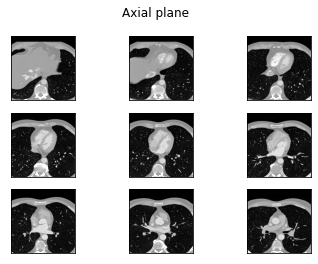

In [56]:
# Axial plane
slice_jump = slices//9

plt.figure('Showing Multiple Slices')
for n in range(1, 10):
    sl = 1 + (n-1)*slice_jump
    axsltmp = im[:, :, sl]
    plt.subplot(3, 3, n)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(axsltmp, cmap='gray', origin='lower', vmin=-1000, vmax=600)

plt.suptitle('Axial plane')

Text(0.5, 0.98, 'Sagital plane')

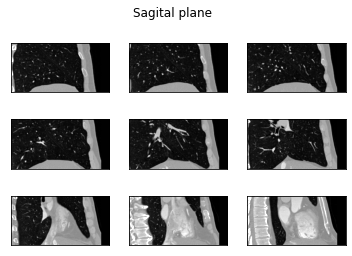

In [57]:
# Sagital plane
slice_jump = slices//9

plt.figure('Showing Multiple Slices')
for n in range(1, 10):
    sl = 1 + (n-1)*slice_jump
    axsltmp = im[:, sl, :]
    plt.subplot(3, 3, n)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(np.rot90(axsltmp), cmap='gray', vmin=-1000, vmax=600)

plt.suptitle('Sagital plane')

Text(0.5, 0.98, 'Coronal plane')

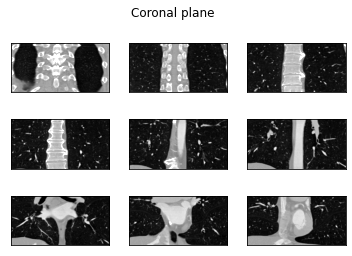

In [58]:
# Coronal plane
slice_jump = slices//9

plt.figure('Showing Multiple Slices')
for n in range(1, 10):
    sl = 1 + (n-1)*slice_jump
    axsltmp = im[sl, :, :]
    plt.subplot(3, 3, n)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(np.rot90(axsltmp), cmap='gray', vmin=-1000, vmax=600)

plt.suptitle('Coronal plane')

## 3. Simulate the planar X-ray image that would be obtained by projection along x, assuming that the incident X-ray beam has an intensity I0 = 1200 photons/pixel.

### a. Compute the voxel size along each direction

In [59]:
vxl_x_size  = 19/rows
vxl_y_size  = 19/cols
vxl_z_size = 25/slices
print('Voxel size along:')
print(f'\t x: {vxl_x_size:.4f}cm')
print(f'\t y: {vxl_y_size:.4f}cm')
print(f'\t z: {vxl_z_size:.4f}cm')

Voxel size along:
	 x: 0.0371cm
	 y: 0.0371cm
	 z: 0.0977cm


### b. Write down the attenuation equation, and apply it

In [60]:
# Simulating planar X-ray along x
x_ray_sim_along_x = sum(mu_ct[i, :, :] for i in range(rows))

# Attenuation equation
I0 = 1200
x_ray_x_I = I0*np.exp(-(x_ray_sim_along_x)*vxl_x_size)

### c. Display the resulting projection image

Text(0.5, 1.0, 'X-ray simulation from CT $x$ projection')

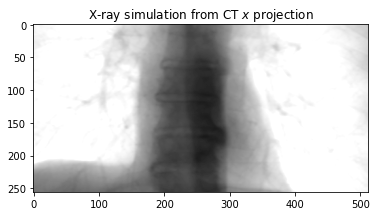

In [61]:
plt.imshow(np.rot90(x_ray_x_I), cmap='gray', vmin=750, vmax=1100)
plt.title('X-ray simulation from CT $x$ projection')

## 4. Now simulate the planar X-ray image that would be obtained by

### a. Projection along x but using twice the X-ray tube current intensity: what changed? (hint: look at the histograms!)

Text(0.5, 0.98, 'Relative difference between X Rays with different $I_0$')

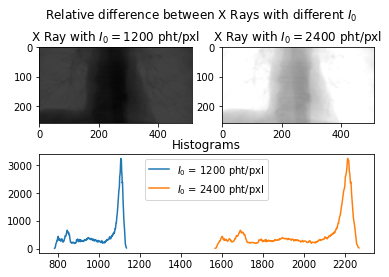

In [62]:
plt.subplot(2,2,1)
plt.imshow(np.rot90(x_ray_x_I), cmap='gray', vmin=750, vmax=2200)
plt.title('X Ray with $I_0 = 1200$ pht/pxl')

I0_2 = 2*I0
x_ray_x_I_2 = I0_2*np.exp(-(x_ray_sim_along_x)*vxl_x_size)
plt.subplot(2,2,2)
plt.imshow(np.rot90(x_ray_x_I_2), cmap='gray', vmin=750, vmax=2200)
plt.title('X Ray with $I_0 = 2400$ pht/pxl')

plt.subplot(2,1,2)
histogram, bin_edges = np.histogram(x_ray_x_I, bins=256)
histogram2, bin_edges2 = np.histogram(x_ray_x_I_2, bins=256)
plt.plot(bin_edges[0:-1], histogram, label='$I_0$ = 1200 pht/pxl')
plt.plot(bin_edges2[0:-1], histogram2, label='$I_0$ = 2400 pht/pxl')
plt.legend()
plt.title('Histograms')

plt.suptitle('Relative difference between X Rays with different $I_0$')

### b. Projection along y (adjust the image intensity scale in order to better visualize the internal organs). 

Text(0.5, 1.0, 'X-ray simulation from CT $y$ projection')

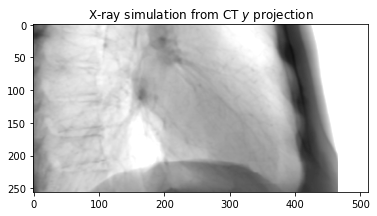

In [63]:
# Simulating planar X-ray along y
x_ray_sim_along_y = sum(mu_ct[:, i, :] for i in range(cols))

# Attenuation equation
I0 = 1200
x_ray_y_I_2 = I0*np.exp(-(x_ray_sim_along_y)*vxl_y_size)

# Plotting
plt.imshow(np.rot90(x_ray_y_I_2), cmap='gray', vmin=750, vmax=1100)
plt.title('X-ray simulation from CT $y$ projection')